In [1]:
import pandas as pd
import random
import itertools
import datetime as dt
import matplotlib.pyplot as plt
import calendar
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv('clean_turnstile_data.csv', low_memory=False)

In [3]:
df['DATETIME'] = pd.to_datetime(df['DATETIME'], format='%Y-%m-%d %H:%M:%S')
df['TOTAL'] = df['ENTRY_DIFFS'] + df['EXIT_DIFFS']
df.set_index('DATETIME', inplace=True)
df.drop(['Unnamed: 0','ENTRY_DIFFS','EXIT_DIFFS','ENTRIES','EXITS'], axis=1, inplace=True)

Time of entries is not always in 4-hour increments. Re-sample dataframe to correct for this, for plotting

In [4]:
df2 = df.groupby(['STATION']).resample(rule='4H').sum().reset_index()
df2['DAY_OF_WEEK'] = df2['DATETIME'].dt.weekday
df2['DATE'] = df2['DATETIME'].dt.date
df2['TIME'] = df2['DATETIME'].dt.time

### Sum over all data

to get a list of high-volume stations

### Heatmap: volume of traffic by day of week & time of day, for a given station

In [16]:
def hm_data_dow_time(s, data_col, dow):
    '''Generates heatmap data for day-of-week x time-of-day
    Inputs:
        s (string) = station name
        data_col (string)  = data column in df2 (e.g. 'ENTRY_DIFFS')
        dow (integer) = day of week, an integer from 0-6, with 0 being Monday
    Output: 
        List of lists of data_col summed over day of week and station, grouped by time
    '''
    assert dow in range(7), "dow must be an integer between 0-6"
    
    return df2[(df2['DAY_OF_WEEK'] == dow) & (df2['STATION'] == s)].groupby('TIME')[data_col].sum()

In [17]:
def heatmap_grid_4x4(station_list, fig_title):
    '''Inputs: station_list (list) = list of station names
               fig_title (string) = Figure Title
        Output:
            4x4 grid of heatmaps, plotting total volume (entries + exits) by day of week & time of day
    '''
    
    vmax = df2['TOTAL'].max() * 1.5
    vmin = df2['TOTAL'].min()
    
    xlabel_hm = [str(int(x)) + 'h' for x in np.linspace(0,20,6)]
    ylabel_hm = calendar.day_name[:]
    
    fig, ax = plt.subplots(4,4, figsize=(20,20))
    plt.suptitle(fig_title, fontsize=20)

    for i, s in enumerate(station_list):
        plt.subplot(4,4,i+1)

        if i % 4 == 0:
            ylabel=ylabel_hm
        else:
            ylabel=False

        if i > 11:
            xlabel=xlabel_hm
        else:
            xlabel=False

        hm_data = [hm_data_dow_time(s, 'TOTAL', d) for d in range(7)]
        sns.heatmap(hm_data, xticklabels = xlabel, yticklabels=ylabel, 
                    cbar=False, cmap='coolwarm')
        plt.title(s)

Generate dummy data to test functions:

In [8]:
grp2 = df2.groupby(['STATION'])['TOTAL'].sum().reset_index()

highest_vol = list(set(grp2.sort_values('TOTAL').tail(16)['STATION']))
lowest_vol = list(set(grp2.sort_values('TOTAL').head(16)['STATION']))
rand_vol = list(set(grp2.sort_values('TOTAL').sample(16)['STATION']))

n = len(grp2)

mid_vol = list(set(grp2.sort_values('TOTAL').iloc[(n//2)-8:(n//2)+8]['STATION']))

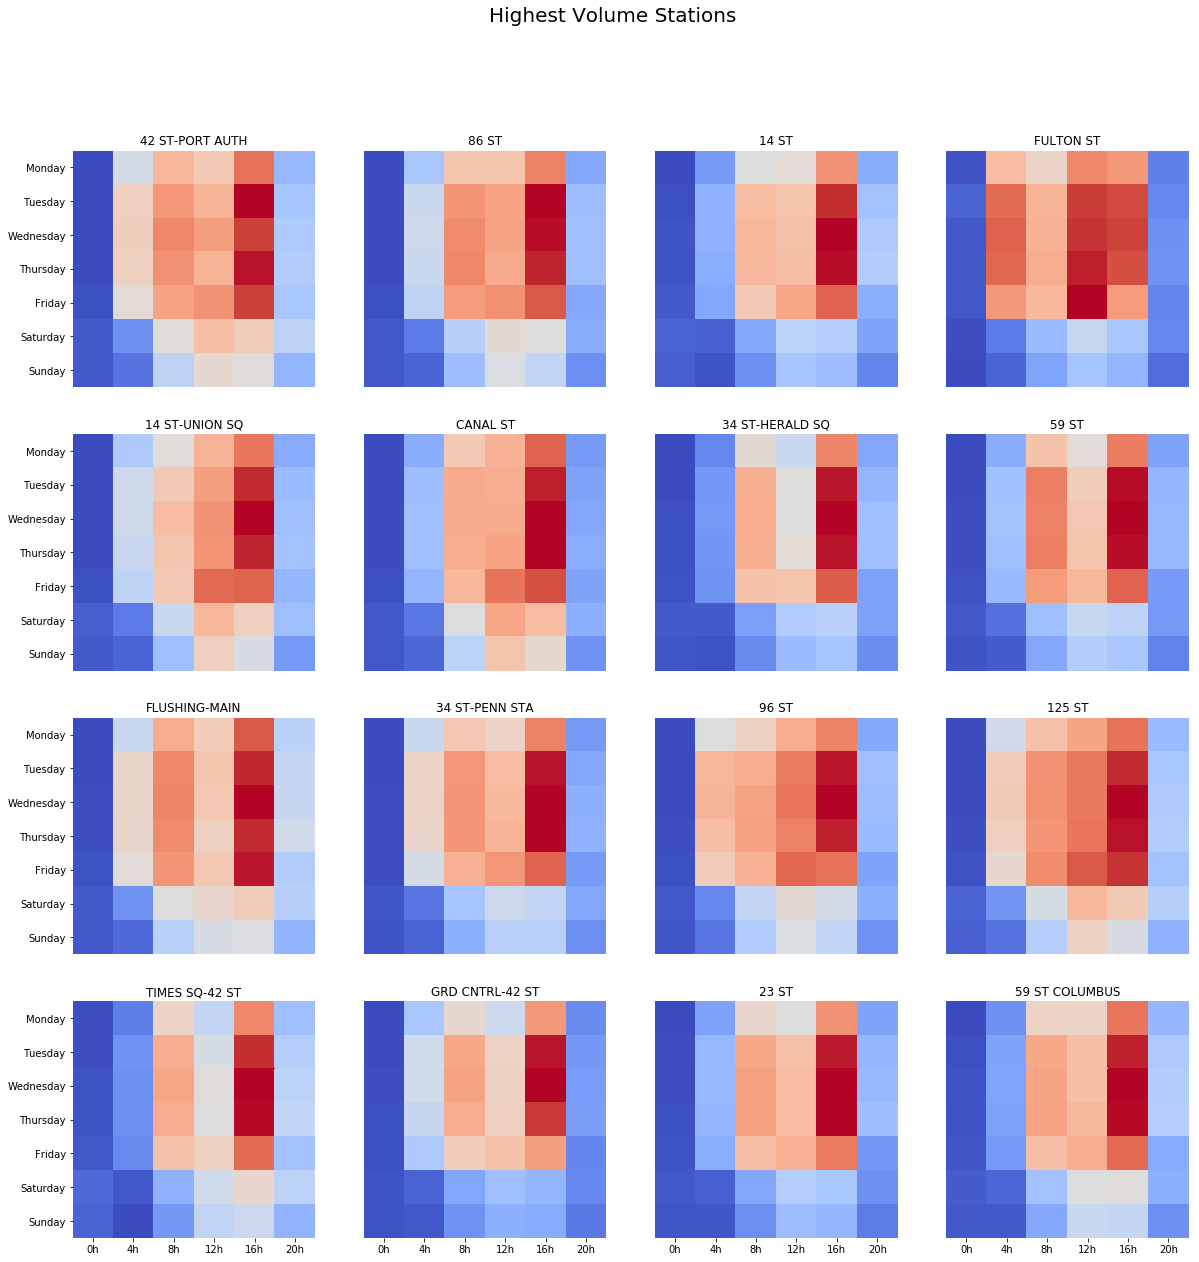

In [18]:
heatmap_grid_4x4(highest_vol, 'Highest Volume Stations')